In [1]:
from hybrid import Hybrid
import pandas as pd

2025-04-04 13:41:39.005313: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
freq = 60
df = pd.read_csv("../data/worldcup98_may_minute.csv", index_col=0, parse_dates=True)
downsampled_df = df.resample(str(freq) + "T").mean()
data = downsampled_df["count"].values

/var/folders/bs/86b5gqbn01v4n3m714kts3vr0000gn/T/ipykernel_83939/650842910.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  downsampled_df = df.resample(str(freq) + "T").mean()


In [3]:
# SARIMA order found from previous data analysis
p,d,q = (4,1,2)
P,D,Q,m = (4,1,1,24)

hybrid = Hybrid(sarima_order=(p,d,q), sarima_seasonal_order=(P,D,Q,m))

In [ ]:
from sklearn.metrics import mean_squared_error

window_size = 700
refit = False
data = downsampled_df["count"].values

actuals = []
hybrid_predictions = []
sarima_predictions = []
naive_predictions = []

lstm_residual_predictions = []
residual_actuals = []



for t in range(window_size, len(data)):
  print(f"{t+1} / {len(data)}")
  
  actual = data[t]
  
  train_data = data[t - window_size : t]
  actual = data[t]
  
  naive_predictions.append(data[t-1])
  
  # Fit hybrid
  hybrid.fit(train_data)
  
  forecast = hybrid.forecast(horizon=1)
  
  hybrid_predictions.append(forecast["hybrid_forecast"])
  sarima_predictions.append(forecast["sarima_forecast"])
  lstm_residual_predictions.append(forecast["lstm_residual_forecast"])
  residual_actuals.append(actual - forecast["sarima_forecast"])
  actuals.append(actual)

701 / 744
Fitting SARIMA


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMA in 0:01:59.867071
Fitting LSTM
Epoch 1/20


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.7150 - val_loss: 0.6013
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6799 - val_loss: 0.5986
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6623 - val_loss: 0.6034
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.8439 - val_loss: 0.6044
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8140 - val_loss: 0.6036
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.4794 - val_loss: 0.5898
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.0855 - val_loss: 0.5856
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7199 - val_loss: 0.5827
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 1.0857 - val_loss: 0.4912
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.6364 - val_loss: 0.5029
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.7192 - val_loss: 0.4877
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.9998 - val_l

/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMA in 0:02:13.024162
Fitting LSTM
Epoch 1/20


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 1.4365 - val_loss: 0.5341
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9594 - val_loss: 0.5325
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7648 - val_loss: 0.5417
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.3382 - val_loss: 0.5361
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.1714 - val_loss: 0.5385
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.0506 - val_loss: 0.5386
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9815 - val_loss: 0.5234
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.3440 - val_loss: 0.5159
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0349 - val_loss: 0.5312
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.9241 - val_loss: 0.5254
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8939 - val_loss: 0.4768
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9850 - val_l

/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMA in 0:02:23.791950
Fitting LSTM
Epoch 1/20


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.8528 - val_loss: 0.5801
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.9226 - val_loss: 0.5830
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.6694 - val_loss: 0.5935
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.0911 - val_loss: 0.5926
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0143 - val_loss: 0.6010
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9517 - val_loss: 0.5938
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.7608 - val_loss: 0.5911
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1312 - val_loss: 0.5849
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.4669 - val_loss: 0.5676
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.7326 - val_loss: 0.5417
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8428 - val_loss: 0.5296
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.8086 - val_l

/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMA in 0:02:08.273285
Fitting LSTM
Epoch 1/20


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.8225 - val_loss: 0.6328
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6818 - val_loss: 0.6339
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7989 - val_loss: 0.6360
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9454 - val_loss: 0.6362
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.2065 - val_loss: 0.6291
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0845 - val_loss: 0.6197
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.5089 - val_loss: 0.6086
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.9604 - val_loss: 0.5851
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9382 - val_loss: 0.5360
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8298 - val_loss: 0.5570
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5688 - val_loss: 0.5505
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9493 - val_l

/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMA in 0:02:31.299883
Fitting LSTM
Epoch 1/20


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.7119 - val_loss: 0.6429
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.4907 - val_loss: 0.6507
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.9432 - val_loss: 0.6470
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.2632 - val_loss: 0.6517
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5970 - val_loss: 0.6481
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.4061 - val_loss: 0.6500
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.5632 - val_loss: 0.6550
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7174 - val_loss: 0.6342
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.0120 - val_loss: 0.6180
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6714 - val_loss: 0.5882
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6767 - val_loss: 0.5375
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.2156 - val_l

/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMA in 0:02:10.053441
Fitting LSTM
Epoch 1/20


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 1.0267 - val_loss: 0.6107
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.9397 - val_loss: 0.6078
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7605 - val_loss: 0.6085
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0317 - val_loss: 0.6057
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.5056 - val_loss: 0.6016
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.2416 - val_loss: 0.5730
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.3236 - val_loss: 0.5455
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.8796 - val_loss: 0.5765
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5838 - val_loss: 0.5381
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5693 - val_loss: 0.5345
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7865 - val_loss: 0.5184
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7780 - val_l

/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMA in 0:02:07.888974
Fitting LSTM
Epoch 1/20


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 1.4852 - val_loss: 0.6407
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.8613 - val_loss: 0.6399
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8111 - val_loss: 0.6527
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.3391 - val_loss: 0.6516
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7704 - val_loss: 0.6473
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.9123 - val_loss: 0.6404
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8806 - val_loss: 0.6293
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.6923 - val_loss: 0.5955
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.3640 - val_loss: 0.5796
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0076 - val_loss: 0.5784
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.4548 - val_loss: 0.5318
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.6709 - val_l

/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMA in 0:02:16.489597
Fitting LSTM
Epoch 1/20


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 1.8510 - val_loss: 0.6205
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 1.3157 - val_loss: 0.6254
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.1035 - val_loss: 0.6176
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.2335 - val_loss: 0.6102
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8051 - val_loss: 0.6113
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.9874 - val_loss: 0.6078
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.0985 - val_loss: 0.5785
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5926 - val_loss: 0.5428
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6821 - val_loss: 0.5832
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7876 - val_loss: 0.5506
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8120 - val_loss: 0.5002
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.3836 - val_l

/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMA in 0:01:55.966922
Fitting LSTM
Epoch 1/20


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.9766 - val_loss: 0.5870
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.1289 - val_loss: 0.5969
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.1207 - val_loss: 0.6075
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9330 - val_loss: 0.6016
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7109 - val_loss: 0.5975
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7993 - val_loss: 0.6135
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.3346 - val_loss: 0.6131
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8029 - val_loss: 0.5845
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8589 - val_loss: 0.5332
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7209 - val_loss: 0.5582
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.2191 - val_loss: 0.5303
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6079 - val_l

/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMA in 0:02:07.441749
Fitting LSTM
Epoch 1/20


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.8848 - val_loss: 0.6283
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7932 - val_loss: 0.6358
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.2524 - val_loss: 0.6372
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.2870 - val_loss: 0.6399
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7464 - val_loss: 0.6336
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8062 - val_loss: 0.6223
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8852 - val_loss: 0.6211
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8456 - val_loss: 0.5939
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8544 - val_loss: 0.5582
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8938 - val_loss: 0.5249
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 1.3581 - val_loss: 0.4794
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.7652 - val_l

/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMA in 0:01:55.012890
Fitting LSTM
Epoch 1/20


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.7447 - val_loss: 0.6474
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.0451 - val_loss: 0.6465
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1575 - val_loss: 0.6458
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.4715 - val_loss: 0.6398
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7519 - val_loss: 0.6185
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9635 - val_loss: 0.6087
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.6176 - val_loss: 0.5974
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.8140 - val_loss: 0.5971
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.3379 - val_loss: 0.5676
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8115 - val_loss: 0.5420
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.4534 - val_loss: 0.5194
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.5998 - val_l

/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


hybrid_mae 117.19933926316435
naive_mae 171.68518518518516
sarima_mae 138.16923759940022


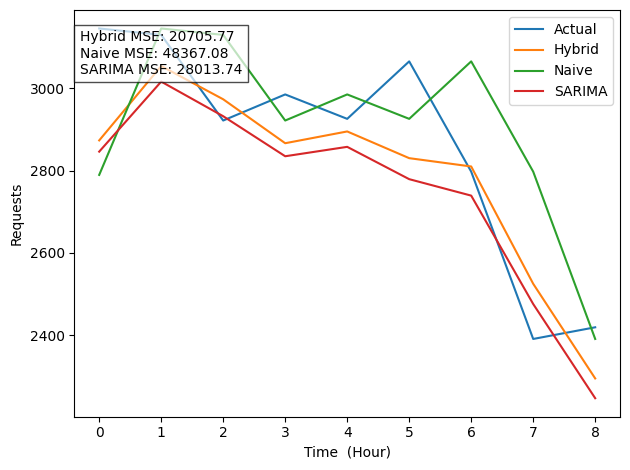

In [ ]:

from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error


hybrid_mse = mean_squared_error(hybrid_predictions, actuals)
naive_mse = mean_squared_error(naive_predictions, actuals)
sarima_mse = mean_squared_error(sarima_predictions, actuals)

hybrid_mae = mean_absolute_error(hybrid_predictions, actuals)
naive_mae = mean_absolute_error(naive_predictions, actuals)
sarima_mae = mean_absolute_error(sarima_predictions, actuals)

print("hybrid_mae", hybrid_mae)
print("naive_mae", naive_mae)
print("sarima_mae", sarima_mae)


plt.plot(actuals, label="Actual")
plt.plot(hybrid_predictions, label="Hybrid")
plt.plot(naive_predictions, label="Naive")
plt.plot(sarima_predictions, label="SARIMA")
plt.xlabel("Time  (Hour)")
plt.ylabel("Requests")
plt.legend()

mse_text = (
    f"Hybrid MSE: {hybrid_mse:.2f}\n"
    f"Naive MSE: {naive_mse:.2f}\n"
    f"SARIMA MSE: {sarima_mse:.2f}"
)
plt.text(0.01, 0.95, mse_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
filename= f"figures/ARIMA({p},{d},{q})({P},{D},{Q})-norefit-onestep-scaled.png"
# plt.savefig(filename, dpi=300)
# print(f"Saved figure to {filename}")
plt.show()

In [ ]:
residual_actuals

[]

In [ ]:

from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error


residual_mse = mean_squared_error(lstm_residual_predictions, residual_actuals)


residual_mae = mean_absolute_error(lstm_residual_predictions, residual_actuals)

print("residual_mse", residual_mse)
print("residual_mae", residual_mae)



plt.plot(residual_actuals, label="Actual")
plt.plot(lstm_residual_predictions, label="LSTM")
plt.xlabel("Time  (Hour)")
plt.ylabel("Residual")
plt.legend()

mse_text = (
    f"residual_mse {residual_mse:.2f}\n"
    f"residual_mae: {residual_mae:.2f}\n"
)
plt.text(0.01, 0.95, mse_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
# filename= f"figures/ARIMA({p},{d},{q})({P},{D},{Q})-norefit-onestep-scaled.png"
# plt.savefig(filename, dpi=300)
# print(f"Saved figure to {filename}")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [9, 0]